In [77]:
!pip install lightkurve

    100% |████████████████████████████████| 409kB 12.1MB/s ta 0:00:01
    100% |████████████████████████████████| 4.2MB 764kB/s eta 0:00:01ta 0:00:01�██████████▌       | 3.2MB 31.9MB/s eta 0:00:01
  Running setup.py bdist_wheel for lightkurve ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/e2/b4/10/660cfc5ddfbbd8935a31974b4e7012e79357c83588488c220d
  Running setup.py bdist_wheel for oktopus ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/9b/90/81/098fc66ee56166d63c9a8fc0a9672ae7b3423396a588ec952a
  Running setup.py bdist_wheel for bs4 ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
  Running setup.py bdist_wheel for astroquery ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
  Running setup.py bdist_wheel for autograd ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/72/6f/c2/40f130cca2c91f31d354b

In [80]:
!pip install bokeh

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [41]:
hdu = fits.open("ktwo211090981-c04_llc.fits")
data = hdu[1].data
print(hdu[1].columns)
time = data['TIME']
raw_flux = data['SAP_FLUX']
flux = data['PDCSAP_FLUX']
fluxerr = data['PDCSAP_FLUX_ERR']

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [106]:
avflux = np.nanmean(flux)
print(avflux)
relflux = (flux / avflux)
print(np.nanmean(relflux))
condition = ((relflux<1.2) & (relflux>0.8))
relflux_filt = np.extract(condition,relflux)
fluxerr_filt = np.extract(condition,fluxerr)
print(len(relflux),len(relflux_filt))
stddev = np.nanstd(relflux_filt)
print(stddev)
averror = np.nanmean(fluxerr_filt)
print(averror/avflux)

relflux_nan = np.nan_to_num(relflux)
print(relflux_nan[33])


154.73494
0.99999994
3470 3280
0.03546769
0.024059262
0.0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


Text(2230, 0.05, 'K2 PDCSAP')

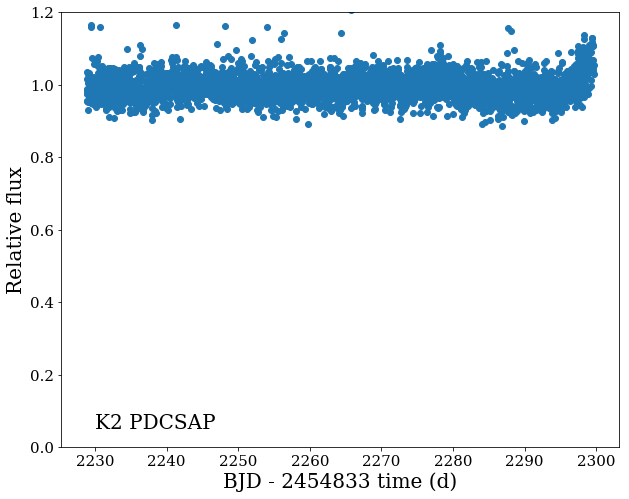

In [73]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='15')
plt.rc('ytick', labelsize='15')
fig = plt.figure(figsize=(10, 8))

plt.xlabel('BJD - 2454833 time (d)',fontsize=20)
plt.ylabel('Relative flux', fontsize=20)
plt.ylim(0.0,1.2)
#plt.xlim(2230,2240)
plt.scatter(time,relflux)
plt.text(2230,0.05,'K2 PDCSAP',fontsize=20)

In [85]:
from lightkurve import search_targetpixelfile
tpf = search_targetpixelfile(211090981,campaign=4).download()

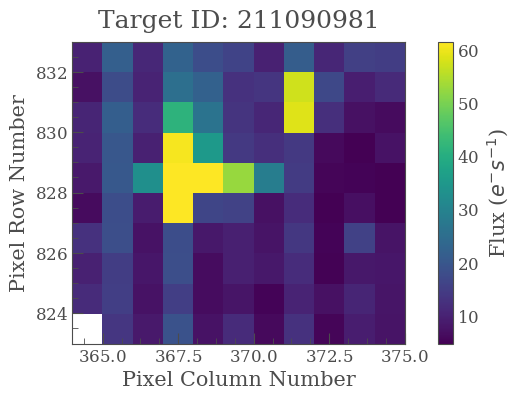

In [112]:
tpf.plot(frame=38)

In [83]:
lc = tpf.to_lightcurve(aperture_mask='all');

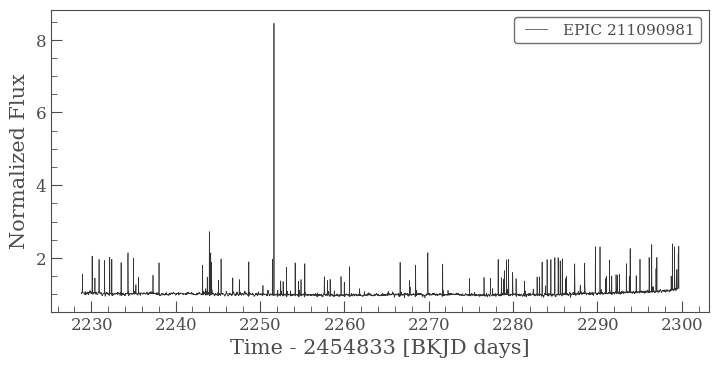

In [84]:
lc.plot()